This notebook is for sentiment analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from IPython.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
TOKENS=pd.read_pickle("/Users/Lingmin/Desktop/Patent_project/data/TOKENS.pickle")

In [3]:
TOKENS

pos_tuple  pos   token_str    term_str
doc_id  token_num                                               
5597916 0           (examples, NNS)  NNS    examples    examples
        1          (analytical, JJ)   JJ  analytical  analytical
        2               (data, NNS)  NNS        data        data
        3               (were, VBD)  VBD        were        were
        4           (recorded, VBN)  VBN    recorded    recorded
...                             ...  ...         ...         ...
5619621 4717       (permitted, VBN)  VBN   permitted   permitted
        4718               (by, IN)   IN          by          by
        4719              (the, DT)   DT         the         the
        4720            (prior, JJ)   JJ       prior       prior
        4721              (art, NN)   NN         art         art

[5820454 rows x 4 columns]

In [4]:
VOCAB=pd.read_pickle("/Users/Lingmin/Desktop/Patent_project/data/VOCAB.pickle")
VOCAB

,n,p,i,n_chars,max_pos,n_pos,stop,p_stem
term_str,,,,,,,,
the,516192,8.868587e-02,3.495152,3,DT,1,1,the
of,211333,3.630868e-02,4.783542,2,IN,1,1,of
a,166947,2.868281e-02,5.123670,1,DT,1,1,a
to,140073,2.406565e-02,5.376881,2,TO,1,1,to
and,132468,2.275905e-02,5.457416,3,CC,1,1,and
...,...,...,...,...,...,...,...,...
aspleugluglugluglugluglugluglugluglugluaspglnlys,1,1.718079e-07,22.472700,48,NN,1,0,aspleugluglugluglugluglugluglugluglugluaspglnli
argthrpheleuprogluglnasnproaspmetproprohisleupro,1,1.718079e-07,22.472700,48,JJ,1,0,argthrpheleuprogluglnasnproaspmetproprohisleupro
glyleuproserproprotyrglythrmetaspserserhisvalphe,1,1.718079e-07,22.472700,48,NN,1,0,glyleuproserproprotyrglythrmetaspserserhisvalph


In [5]:
BOW =TOKENS.reset_index().groupby(['doc_id']+['term_str']).term_str.count().to_frame('n') 

In [6]:
BOW 

n
doc_id  term_str      
5590665 a           23
        above       10
        abscissa     3
        accordance   2
        accuracy     2
...                 ..
5704053 yet          2
        yield        3
        yielding     1
        yields       1
        zero         3

[722023 rows x 1 columns]

## add TFIDF

In [7]:
DTCM = BOW.n.unstack().fillna(0).astype('int')

In [8]:
tf_method = 'sum'

In [9]:
print('TF method:', tf_method)
if tf_method == 'sum':
    TF = DTCM.T / DTCM.T.sum()
elif tf_method == 'max':
    TF = DTCM.T / DTCM.T.max()
elif tf_method == 'log':
    TF = np.log2(1 + DTCM.T)
elif tf_method == 'raw':
    TF = DTCM.T
elif tf_method == 'double_norm':
    TF = DTCM.T / DTCM.T.max()
elif tf_method == 'binary':
    TF = DTCM.T.astype('bool').astype('int')
TF = TF.T

TF method: sum


In [10]:
TF.head()

term_str,a,aa,aaa,aaaa,aaaaaaaa,aaaaaaaaaa,aaaaaaaabbbbbbbbccccccccpppppppp,aaaaaaatgacgaaagcccgggtggagcgatttaaagtgagacgcatg,aaaaaacgggttcttgtacaacgaccccgtactattctatccgtggag,aaaaacctcaagatgatgatcatcttgggagtgatttgcgccatcatc,...,zy,zygosity,zyh,zymark,zymate,zymed,zyo,zyp,zz,zzz
doc_id,,,,,,,,,,,,,,,,,,,,,
5590665,0.014820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5590908,0.036868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5591432,0.008414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5592173,0.045539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5592402,0.028642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
DF = DTCM.astype('bool').sum()

In [12]:
N = DTCM.shape[0]

In [13]:
idf_method='standard'

In [14]:
print('IDF method:', idf_method)
if idf_method == 'standard':
    IDF = np.log2(N / DF)
elif idf_method == 'max':
    IDF = np.log2(DF.max() / DF) 
elif idf_method == 'smooth':
    IDF = np.log2((1 + N) / (1 + DF)) + 1

IDF method: standard


In [15]:
TFIDF = TF * IDF

In [16]:
TFIDF

term_str,a,aa,aaa,aaaa,aaaaaaaa,aaaaaaaaaa,aaaaaaaabbbbbbbbccccccccpppppppp,aaaaaaatgacgaaagcccgggtggagcgatttaaagtgagacgcatg,aaaaaacgggttcttgtacaacgaccccgtactattctatccgtggag,aaaaacctcaagatgatgatcatcttgggagtgatttgcgccatcatc,...,zy,zygosity,zyh,zymark,zymate,zymed,zyo,zyp,zz,zzz
doc_id,,,,,,,,,,,,,,,,,,,,,
5590665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5590908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5591432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5592173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5592402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5704016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5704017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
BOW['tf'] = TF.stack()
BOW['tfidf'] = TFIDF.stack()

In [18]:
BOW

n        tf     tfidf
doc_id  term_str                          
5590665 a           23  0.014820  0.000000
        above       10  0.006443  0.001288
        abscissa     3  0.001933  0.009690
        accordance   2  0.001289  0.001322
        accuracy     2  0.001289  0.002267
...                 ..       ...       ...
5704053 yet          2  0.000199  0.000380
        yield        3  0.000298  0.000795
        yielding     1  0.000099  0.000393
        yields       1  0.000099  0.000263
        zero         3  0.000298  0.000315

[722023 rows x 3 columns]

In [19]:
BOW.to_pickle("/Users/Lingmin/Desktop/Patent_project/data/BOW.pickle")

In [20]:
BOW.to_csv(f'/Users/Lingmin/Desktop/Patent_project/data/BOW.csv')

# Adding Lexicon

In [21]:
salex_csv = f'C:/Users/Lingmin/Desktop/Patent_project/data/lexicons/salex_nrc.csv'
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

In [22]:
SALEX = pd.read_csv(salex_csv).set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]
SALEX

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


## Sentiment and emotion values as features in VOCAB 

In [23]:
V = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1) #\
V

,n,p,i,n_chars,max_pos,n_pos,stop,p_stem,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,,,,,,,,,
present,9941,1.707942e-03,9.193525,7,JJ,6,0,present,0,1,0,0,1,0,1,0,1,1,1
operation,6277,1.078438e-03,9.856841,9,NN,1,0,oper,0,0,0,1,0,0,0,0,0,1,0
level,5518,9.480360e-04,10.042771,5,NN,7,0,level,0,0,0,0,0,0,1,0,0,1,1
error,5067,8.705506e-04,10.165784,5,NN,12,0,error,0,0,0,0,0,1,0,1,0,0,-1
case,4906,8.428896e-04,10.212369,4,NN,1,0,case,0,0,0,1,0,1,0,1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vicious,1,1.718079e-07,22.472700,7,JJ,1,0,viciou,1,0,1,0,0,1,0,0,0,0,-1
diversion,1,1.718079e-07,22.472700,9,NN,1,0,divers,0,0,0,0,0,0,1,0,1,0,1
decayed,1,1.718079e-07,22.472700,7,JJ,1,0,decay,0,0,1,0,0,1,0,1,0,0,-1


In [24]:
V.to_csv(f'/Users/Lingmin/Desktop/Patent_project/data/V.csv')

In [25]:
B = BOW.join(V[['max_pos'] + emo_cols], on='term_str', rsuffix='_v').dropna()

In [26]:
B

n        tf     tfidf max_pos  anger  anticipation  \
doc_id  term_str                                                             
5590665 chronic         1  0.000644  0.004394      JJ    0.0           0.0   
        dangerous       1  0.000644  0.004187      JJ    0.0           0.0   
        diagnosis       3  0.001933  0.007757      NN    0.0           1.0   
        discrimination  1  0.000644  0.002654      NN    1.0           0.0   
        disease         1  0.000644  0.002946      NN    1.0           0.0   
...                    ..       ...       ...     ...    ...           ...   
5704053 unique          2  0.000199  0.000390      JJ    0.0           0.0   
        university      1  0.000099  0.000357      NN    0.0           1.0   
        wait            4  0.000397  0.001508      VB    0.0           1.0   
        wasting         1  0.000099  0.000677     VBG    0.0           0.0   
        word            1  0.000099  0.000232      NN    0.0           0.0   

                        disgust  fear  joy  sadness  surprise  trust  \
doc_id  term_str                                                       
5590665 chronic             0.0   0.0  0.0      1.0       0.0    0.0   
        dangerous           0.0   1.0  0.0      0.0       0.0    0.0   
        diagnosis           0.0   1.0  0.0      0.0       0.0    1.0   
        discrimination      1.0   1.0  0.0      1.0       0.0    0.0   
        disease             1.0   1.0  0.0      1.0       0.0    0.0   
...                         ...   ...  ...      ...       ...    ...   
5704053 unique              0.0   0.0  0.0      0.0       1.0    0.0   
        university          0.0   0.0  0.0      0.0       0.0    0.0   
        wait                0.0   0.0  0.0      0.0       0.0    0.0   
        wasting             1.0   1.0  0.0      1.0       0.0    0.0   
        word                0.0   0.0  0.0      0.0       0.0    1.0   

                        sentiment  
doc_id  term_str                   
5590665 chronic              -1.0  
        dangerous            -1.0  
        diagnosis            -1.0  
        discrimination       -1.0  
        disease              -1.0  
...                           ...  
5704053 unique                1.0  
        university            1.0  
        wait                 -1.0  
        wasting              -1.0  
        word                  1.0  

[40740 rows x 13 columns]

In [27]:
for col in emo_cols:
    B[col] = B[col] * B.tfidf

In [28]:
B

n        tf     tfidf max_pos     anger  anticipation  \
doc_id  term_str                                                                
5590665 chronic         1  0.000644  0.004394      JJ  0.000000      0.000000   
        dangerous       1  0.000644  0.004187      JJ  0.000000      0.000000   
        diagnosis       3  0.001933  0.007757      NN  0.000000      0.007757   
        discrimination  1  0.000644  0.002654      NN  0.002654      0.000000   
        disease         1  0.000644  0.002946      NN  0.002946      0.000000   
...                    ..       ...       ...     ...       ...           ...   
5704053 unique          2  0.000199  0.000390      JJ  0.000000      0.000000   
        university      1  0.000099  0.000357      NN  0.000000      0.000357   
        wait            4  0.000397  0.001508      VB  0.000000      0.001508   
        wasting         1  0.000099  0.000677     VBG  0.000000      0.000000   
        word            1  0.000099  0.000232      NN  0.000000      0.000000   

                         disgust      fear  joy   sadness  surprise     trust  \
doc_id  term_str                                                                
5590665 chronic         0.000000  0.000000  0.0  0.004394   0.00000  0.000000   
        dangerous       0.000000  0.004187  0.0  0.000000   0.00000  0.000000   
        diagnosis       0.000000  0.007757  0.0  0.000000   0.00000  0.007757   
        discrimination  0.002654  0.002654  0.0  0.002654   0.00000  0.000000   
        disease         0.002946  0.002946  0.0  0.002946   0.00000  0.000000   
...                          ...       ...  ...       ...       ...       ...   
5704053 unique          0.000000  0.000000  0.0  0.000000   0.00039  0.000000   
        university      0.000000  0.000000  0.0  0.000000   0.00000  0.000000   
        wait            0.000000  0.000000  0.0  0.000000   0.00000  0.000000   
        wasting         0.000677  0.000677  0.0  0.000677   0.00000  0.000000   
        word            0.000000  0.000000  0.0  0.000000   0.00000  0.000232   

                        sentiment  
doc_id  term_str                   
5590665 chronic         -0.004394  
        dangerous       -0.004187  
        diagnosis       -0.007757  
        discrimination  -0.002654  
        disease         -0.002946  
...                           ...  
5704053 unique           0.000390  
        university       0.000357  
        wait            -0.001508  
        wasting         -0.000677  
        word             0.000232  

[40740 rows x 13 columns]

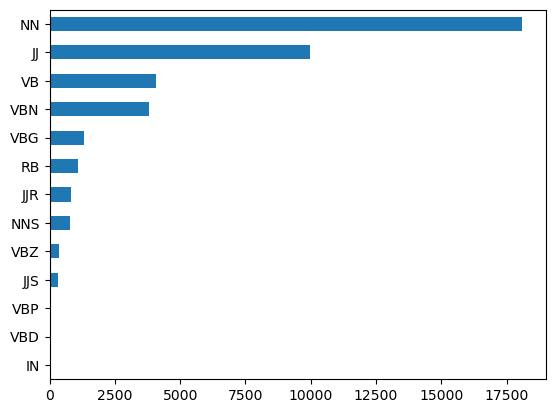

In [29]:
B.max_pos.value_counts().sort_values().plot.barh();

In [30]:
EMO_PTS = B.groupby(['doc_id'])[emo_cols].mean()

In [31]:
EMO_PTS

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment
doc_id,,,,,,,,,
5590665,0.000295,0.001421,0.001352,0.001036,0.001258,0.001979,0.000160,0.002349,-0.000598
5590908,0.000382,0.000216,0.000094,0.000197,0.000238,0.000254,0.000186,0.000601,0.000143
5591432,0.000097,0.000648,0.000930,0.001507,0.000189,0.000734,0.000155,0.000538,-0.001280
5592173,0.000968,0.000287,0.000332,0.000242,0.000100,0.000578,0.000600,0.000979,-0.000357
5592402,0.000310,0.000794,0.000417,0.000222,0.000242,0.000399,0.000173,0.000774,0.000613
...,...,...,...,...,...,...,...,...,...
5704015,0.000097,0.000458,0.000110,0.000317,0.003109,0.000538,0.000750,0.000451,0.002628
5704016,0.000299,0.000293,0.000266,0.000538,0.000214,0.000571,0.000039,0.000581,-0.000176
5704017,0.000188,0.000359,0.000046,0.000191,0.000410,0.000291,0.000152,0.000481,0.000375


In [32]:
EMO_PTS.to_csv(f'/Users/Lingmin/Desktop/Patent_project/data/EMO_PTS.csv')

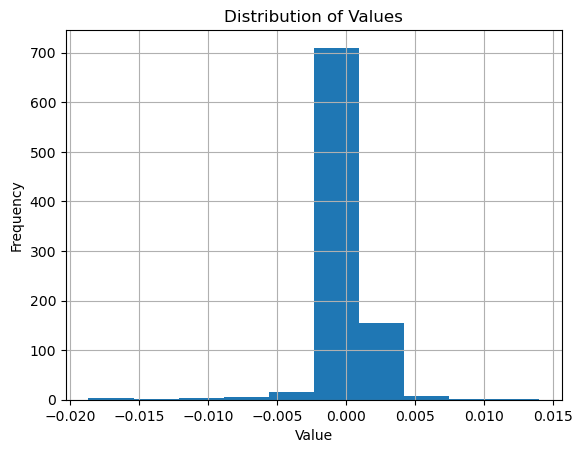

In [35]:
EMO_PTS['sentiment'].hist()

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values')

# display the plot
plt.show()

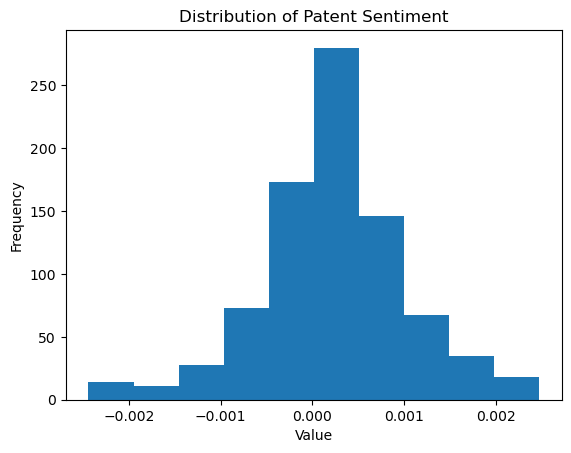

In [34]:
# filter DataFrame to values in range [-0.0025, 0.0025]
subset = EMO_PTS.loc[(EMO_PTS['sentiment'] >= -0.0025) & (EMO_PTS['sentiment'] <= 0.0025), 'sentiment']

# draw histogram of 'col1' column in subset
plt.hist(subset)

# add axis labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Patent Sentiment')
plt.show()